In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import GEOparse as Geo
import seaborn as sns
os.getcwd()

'/home/max/mcrc-cetuximab-analysis/notebooks'

Collect annotation (there is only 1 device used, rest is in the ann.csv table)

In [2]:
gse = Geo.get_GEO(filepath="../raw/GSE183984_family.soft", silent=True)
print(gse.gpls)
for key in gse.gsms:
    df = pd.DataFrame(columns=gse.gsms[key].metadata.keys())
    break

for key in gse.gsms:
    df = pd.concat([df, pd.DataFrame([gse.gsms[key].metadata], index=[key])])

df.to_csv("../data/ann.csv", index=True)

df

{'GPL16791': <d: GPL16791>}


,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,taxid_ch1,...,contact_zip/postal_code,contact_country,instrument_model,library_selection,library_source,library_strategy,relation,supplementary_file_1,series_id,data_row_count
GSM5575333,[POST-R-001 [18R649_010]],[GSM5575333],[Public on Sep 16 2021],[Sep 12 2021],[Sep 16 2021],[SRA],[1],[colorectal cancer],[Homo sapiens],[9606],...,[05505],[South Korea],[Illumina HiSeq 2500],[cDNA],[transcriptomic],[RNA-Seq],[BioSample: https://www.ncbi.nlm.nih.gov/biosa...,[NONE],[GSE183984],[0]
GSM5575334,[PAIR-R-001-pre [18R654_15]],[GSM5575334],[Public on Sep 16 2021],[Sep 12 2021],[Sep 16 2021],[SRA],[1],[colorectal cancer],[Homo sapiens],[9606],...,[05505],[South Korea],[Illumina HiSeq 2500],[cDNA],[transcriptomic],[RNA-Seq],[BioSample: https://www.ncbi.nlm.nih.gov/biosa...,[NONE],[GSE183984],[0]
GSM5575335,[PAIR-R-001 [18R655_016]],[GSM5575335],[Public on Sep 16 2021],[Sep 12 2021],[Sep 16 2021],[SRA],[1],[colorectal cancer],[Homo sapiens],[9606],...,[05505],[South Korea],[Illumina HiSeq 2500],[cDNA],[transcriptomic],[RNA-Seq],[BioSample: https://www.ncbi.nlm.nih.gov/biosa...,[NONE],[GSE183984],[0]
GSM5575336,[POST-R-002 [18R669_01]],[GSM5575336],[Public on Sep 16 2021],[Sep 12 2021],[Sep 16 2021],[SRA],[1],[colorectal cancer],[Homo sapiens],[9606],...,[05505],[South Korea],[Illumina HiSeq 2500],[cDNA],[transcriptomic],[RNA-Seq],[BioSample: https://www.ncbi.nlm.nih.gov/biosa...,[NONE],[GSE183984],[0]
GSM5575337,[PAIR-R-002 [18R670_02]],[GSM5575337],[Public on Sep 16 2021],[Sep 12 2021],[Sep 16 2021],[SRA],[1],[colorectal cancer],[Homo sapiens],[9606],...,[05505],[South Korea],[Illumina HiSeq 2500],[cDNA],[transcriptomic],[RNA-Seq],[BioSample: https://www.ncbi.nlm.nih.gov/biosa...,[NONE],[GSE183984],[0]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM5575441,[PRE-R-051 [18R454_027]],[GSM5575441],[Public on Sep 16 2021],[Sep 12 2021],[Sep 16 2021],[SRA],[1],[colorectal cancer],[Homo sapiens],[9606],...,[05505],[South Korea],[Illumina HiSeq 2500],[cDNA],[transcriptomic],[RNA-Seq],[BioSample: https://www.ncbi.nlm.nih.gov/biosa...,[NONE],[GSE183984],[0]
GSM5575442,[PRE-R-052 [18R477_019]],[GSM5575442],[Public on Sep 16 2021],[Sep 12 2021],[Sep 16 2021],[SRA],[1],[colorectal cancer],[Homo sapiens],[9606],...,[05505],[South Korea],[Illumina HiSeq 2500],[cDNA],[transcriptomic],[RNA-Seq],[BioSample: https://www.ncbi.nlm.nih.gov/biosa...,[NONE],[GSE183984],[0]
GSM5575443,[PRE-10 [18R507_004]],[GSM5575443],[Public on Sep 16 2021],[Sep 12 2021],[Sep 16 2021],[SRA],[1],[colorectal cancer],[Homo sapiens],[9606],...,[05505],[South Korea],[Illumina HiSeq 2500],[cDNA],[transcriptomic],[RNA-Seq],[BioSample: https://www.ncbi.nlm.nih.gov/biosa...,[NONE],[GSE183984],[0]
GSM5575444,[PRE-R-054 [18R428_008]],[GSM5575444],[Public on Sep 16 2021],[Sep 12 2021],[Sep 16 2021],[SRA],[1],[colorectal cancer],[Homo sapiens],[9606],...,[05505],[South Korea],[Illumina HiSeq 2500],[cDNA],[transcriptomic],[RNA-Seq],[BioSample: https://www.ncbi.nlm.nih.gov/biosa...,[NONE],[GSE183984],[0]


Examine raw counts/FPKM data

In [3]:
fpkms_df = pd.read_csv("../raw/GSE183984_ASAN_RNASEQ_FPKM_ensg.csv", index_col=0).T
raw_counts_df = pd.read_csv("../raw/GSE183984_ASAN_RNASEQ_raw_counts_ensg.csv", index_col=0).T

print(fpkms_df.shape)
print(raw_counts_df.shape)

# Check that columns are the same in TPM and FPKM
print(set(fpkms_df.columns) - set(raw_counts_df.columns))
print(set(raw_counts_df.columns) - set(fpkms_df.columns))

print(''.join(list(raw_counts_df.columns)).find('T')) # no transcript level distinction
# but somehow many genes???

(113, 58735)
(113, 58735)
set()
set()
-1


Count lengths of genes

In [4]:
!wget https://ftp.ensembl.org/pub/current_gtf/homo_sapiens/Homo_sapiens.GRCh38.113.gtf.gz
!gzip -d Homo_sapiens.GRCh38.113.gtf.gz
!mv Homo_sapiens.GRCh38.113.gtf ../data/L_Homo_sapiens.GRCh38.113.gtf

--2025-04-25 08:17:25--  https://ftp.ensembl.org/pub/current_gtf/homo_sapiens/Homo_sapiens.GRCh38.113.gtf.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64141785 (61M) [application/x-gzip]
Saving to: ‘Homo_sapiens.GRCh38.113.gtf.gz’

Homo_sapiens.GRCh38 100%[===================>]  61.17M  9.18MB/s    in 7.0s    

2025-04-25 08:17:32 (8.77 MB/s) - ‘Homo_sapiens.GRCh38.113.gtf.gz’ saved [64141785/64141785]



Total genes:  62754


<Axes: ylabel='Count'>

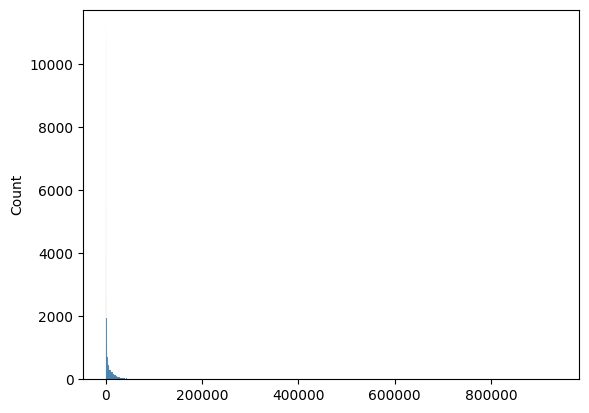

In [5]:
from collections import Counter

def parse_gtf_gene_lengths(gtf_path):
    res = Counter()
    with open(gtf_path, "r") as f:
        for li, line in enumerate(f):
            # print(line)
            if line.startswith("#"):
                continue
            parts = line.strip().split()
            if len(parts) > 10:
                if parts[2] == 'exon':
                    gene = parts[9][1:-2]
                    res[gene] += int(parts[4]) - int(parts[3]) + 1
    return res

gene_lengths = parse_gtf_gene_lengths('../data/L_Homo_sapiens.GRCh38.110.gtf')
print('Total genes: ', len(gene_lengths))
sns.histplot(gene_lengths)

Remove genes not in dataset

In [6]:
new_gene_lengths = dict()
for gene, l in gene_lengths.items():
    if gene in raw_counts_df.columns:
        new_gene_lengths[gene] = l
gene_lengths = new_gene_lengths
print(len(gene_lengths))

58261


Convert raw counts to TPM and get FPKM from counts to check if it matches.

In [13]:
def counts_to_tpm(counts):
    gl_df = pd.Series(gene_lengths)
    tpm = counts / (gl_df / 1000)
    print(tpm.isna().sum().sum())
    tpm = (tpm.T / tpm.sum(axis=1)).T * 1_000_000
    # print(tpm)
    return tpm

def counts_to_fpkm(counts):
    gl_df = pd.Series(gene_lengths)
    fpkm = (counts.T / counts.sum(axis=1)).T * 1_000_000
    fpkm = fpkm / (gl_df / 1000)
    # print(tpm)
    return fpkm

print(raw_counts_df.shape)

tpm = counts_to_tpm(raw_counts_df)

fpkm_from_counts = counts_to_fpkm(raw_counts_df)
fpkm_from_counts
raw_counts_df

(113, 58735)
53562


name,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000285985,ENSG00000285986,ENSG00000285987,ENSG00000285988,ENSG00000285989,ENSG00000285990,ENSG00000285991,ENSG00000285992,ENSG00000285993,ENSG00000285994
18R176_0020,6120.0,35.0,21221.0,893.33,1786.67,299.0,5898.06,2670.80,7658.0,667.0,...,0.0,0.0,0.0,0.0,0.0,44.94,4.25,0.0,0.0,6.0
18R177_0021,2482.0,0.0,6484.0,951.89,1139.11,52.0,4507.60,1900.61,3890.0,977.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,3.0
18R178_0022,4496.0,15.0,19273.0,1642.82,3399.18,117.0,7401.53,3809.73,8143.0,1297.0,...,0.0,0.0,0.0,0.0,0.0,60.85,4.37,0.0,0.0,0.0
18R296_0008,7900.0,13.0,12081.0,601.70,1110.30,111.0,4960.20,1774.45,3662.0,724.0,...,0.0,0.0,0.0,0.0,0.0,7.00,0.00,0.0,0.0,1.0
18R301_0002,5534.0,179.0,8251.0,724.60,1687.40,65.0,5152.11,1733.02,4411.0,613.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18R309_0015,573.0,0.0,5604.0,940.69,1414.31,72.0,74549.83,1376.35,9414.0,732.0,...,0.0,0.0,0.0,0.0,0.0,4.58,0.00,0.0,0.0,1.0
18R310_0016,2373.0,3.0,5872.0,588.62,720.38,278.0,58313.22,967.30,3492.0,978.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,2.0
18R311_0018,2492.0,14.0,4721.0,661.83,858.17,88.0,25244.32,1287.38,3851.0,3635.0,...,0.0,0.0,0.0,0.0,0.0,4.77,4.52,0.0,0.0,5.0
18R318_0005,3871.0,155.0,8585.0,625.70,1738.30,296.0,4838.98,2162.47,5214.0,885.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,4.0


In [8]:
fpkms_df

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000285985,ENSG00000285986,ENSG00000285987,ENSG00000285988,ENSG00000285989,ENSG00000285990,ENSG00000285991,ENSG00000285992,ENSG00000285993,ENSG00000285994
18R176_0020,45.280046,0.495756,342.868915,2.773994,10.184460,3.103515,23.360949,20.080874,71.407237,6.533307,...,0.0,0.0,0.0,0.0,0.0,1.340882,0.012324,0.0,0.0,0.025341
18R177_0021,25.722897,0.000000,121.849606,5.055512,7.814631,0.558933,22.209571,16.011214,49.972448,11.223808,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.014759
18R178_0022,27.194953,0.154119,252.719297,5.433977,18.449100,0.825784,23.688859,24.349221,55.332365,10.450856,...,0.0,0.0,0.0,0.0,0.0,1.458268,0.010097,0.0,0.0,0.000000
18R296_0008,109.785774,0.235961,279.462000,3.797048,8.480116,1.907915,29.248210,17.984330,50.445059,10.373472,...,0.0,0.0,0.0,0.0,0.0,0.296413,0.000000,0.0,0.0,0.006099
18R301_0002,65.784756,3.489444,195.410934,3.370070,14.584281,0.654896,28.733120,18.522873,70.207217,8.701362,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.012402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18R309_0015,6.481335,0.000000,141.290244,5.606179,12.562676,0.876152,470.362066,15.736300,195.907286,11.164287,...,0.0,0.0,0.0,0.0,0.0,0.237175,0.000000,0.0,0.0,0.006495
18R310_0016,34.224539,0.070039,175.625459,4.481064,7.451890,4.539485,438.684157,12.712224,91.288851,17.417022,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.015576
18R311_0018,27.434573,0.267541,117.294054,3.178346,8.016237,1.068706,154.186208,13.531719,71.349075,53.475305,...,0.0,0.0,0.0,0.0,0.0,0.231209,0.022972,0.0,0.0,0.031544
18R318_0005,42.425748,2.768670,196.107812,3.927237,13.047893,3.886007,26.554131,22.062728,93.382817,12.465352,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.024005


Check that FPKM is correct (sums to 1 after multiplying by gene length and dividing on 10^6)

In [15]:
# should be sum 1 in every row
(fpkm_from_counts * (pd.Series(gene_lengths) / 1000)).sum(axis=1) / 10 ** 6

18R176_0020    0.997726
18R177_0021    0.998148
18R178_0022    0.997984
18R296_0008    0.997582
18R301_0002    0.996694
                 ...   
18R309_0015    0.998043
18R310_0016    0.998077
18R311_0018    0.997562
18R318_0005    0.998233
18R319_0014    0.996868
Length: 113, dtype: float64

Get log-tpms and plot gene expression distribution for individual sample / average

(0.0, 1000.0)

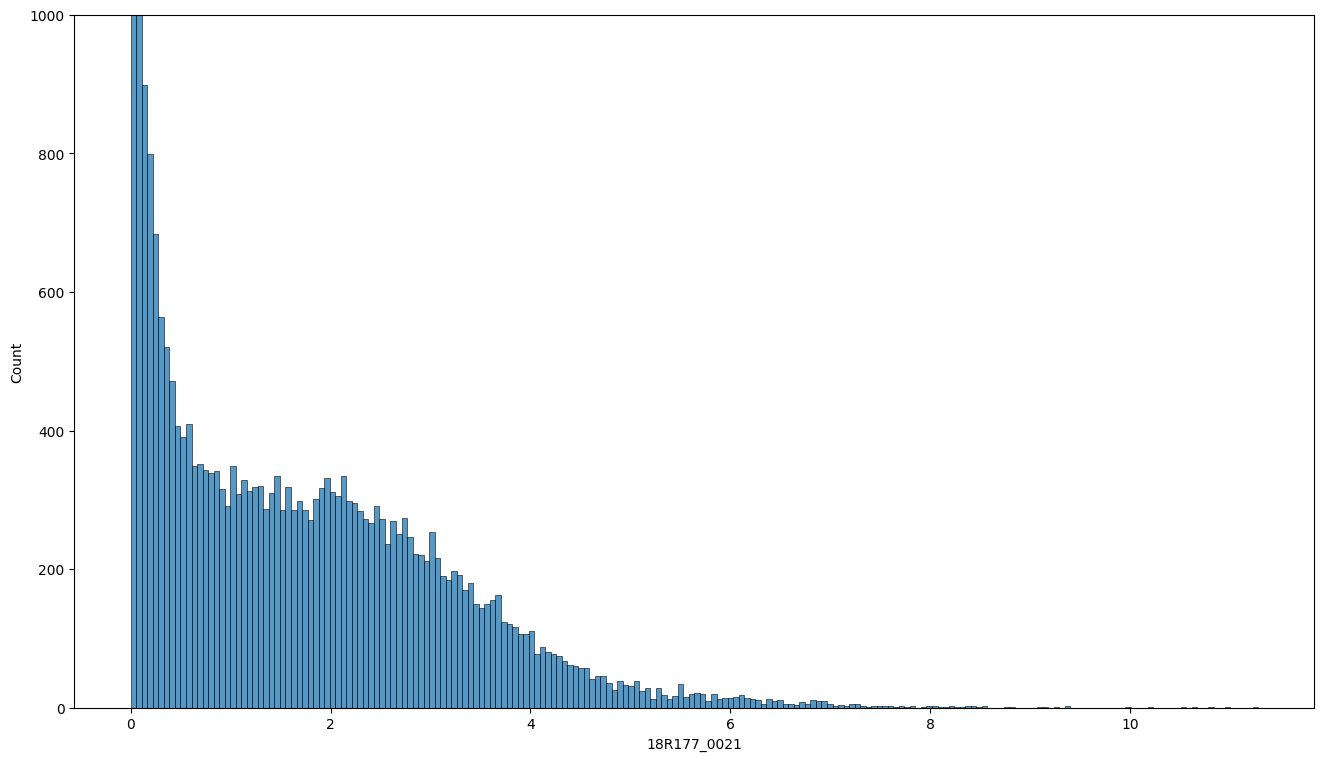

In [10]:
log_tpm = tpm.apply(lambda x: np.log(1 + x))
plt.figure(figsize=(16, 9))
sns.histplot(log_tpm.iloc[1])
plt.ylim(0, 1000)

(0.0, 1000.0)

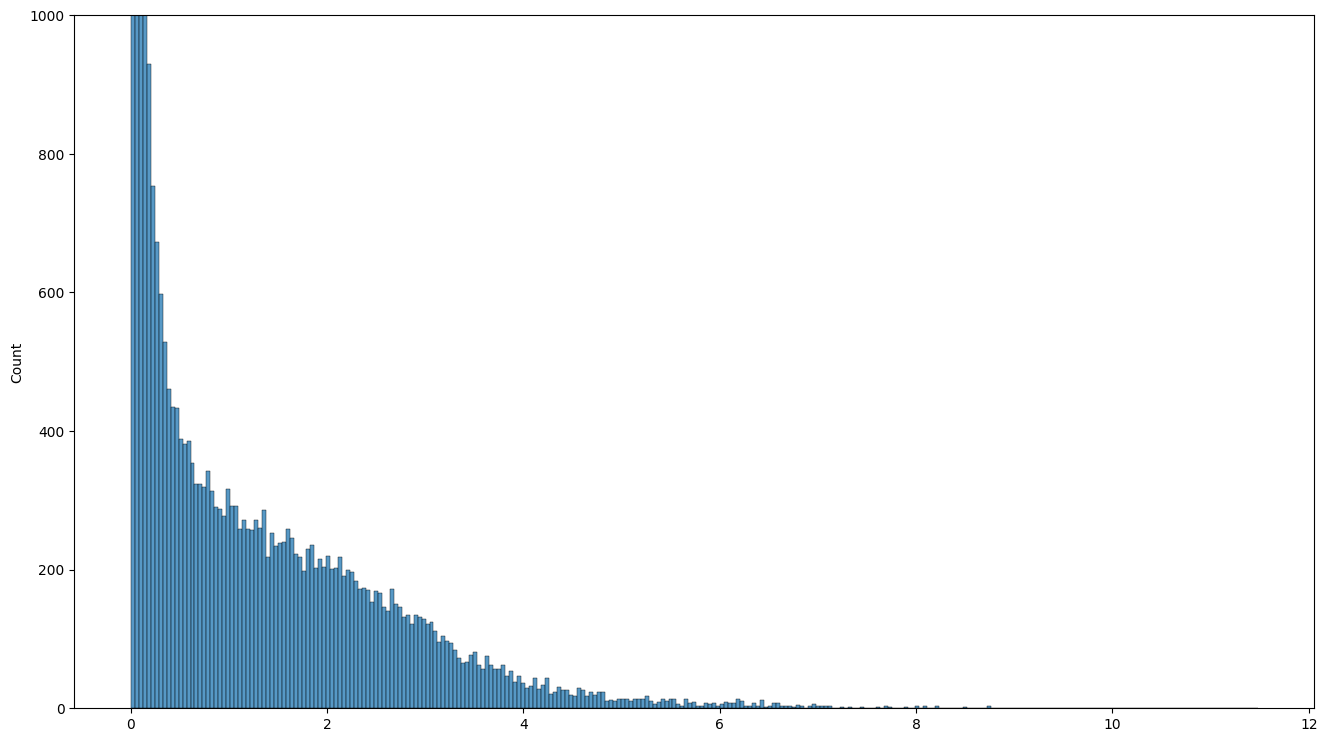

In [11]:
plt.figure(figsize=(16, 9))
sns.histplot(log_tpm.mean())
plt.ylim(0, 1000)

In [12]:
from time import time
import mygene

mg = mygene.MyGeneInfo()

# Example list of Ensembl gene IDs
ensembl_ids = log_tpm.columns

t1 = time()
# Query
result = mg.querymany(ensembl_ids, scopes="ensembl.gene", fields="symbol", species="human")
t2 = time()
print(t2-t1)

# Convert to dict: {ensembl_id: gene_symbol}
id_to_name = {item['query']: item.get('symbol', None) for item in result}

log_tpm = log_tpm.rename(columns=id_to_name)
log_tpm.to_csv('../data/log_tpm_hgvs.csv')

Input sequence provided is already in string format. No operation performed
Input sequence provided is already in string format. No operation performed


KeyboardInterrupt: 